# Initial Data Exploration

In [1]:
import pandas as pd

In [2]:
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('../data/external/cardio_train.csv', delimiter=';')

#### View the summerized data
First Insights:  
- Dataset is complete, seemingly has no missing values.  
- Id columns values are ranged from 0 to 99999 but has 70000 values, yet quantiles does not indicate skewness. Some rows may got removed conciously.  
- Age column contains something other than years with 20k mean value. -> Data source confirms that age column is age by days.  
- Some of the columns are categorical data encoded with integers. Mapping of integers to their meanings should be gathered from the source.  

 Information From Source:  
> **Data description**  
> There are 3 types of input features:    
>  
>    - Objective: factual information;  
>    - Examination: results of medical examination;  
>    - Subjective: information given by the patient.  
>  
>Features:  
>    |Title|Topic|Column Name| DType|
>    |-----|-----|-----------|------|
>    | Age | Objective Feature | age | int (days)  
>    | Height | Objective Feature | height | int (cm) |  
>    | Weight | Objective Feature | weight | float (kg) |  
>    | Gender | Objective Feature | gender | categorical code |  
>    | Systolic blood pressure | Examination Feature | ap_hi | int |  
>    | Diastolic blood pressure | Examination Feature | ap_lo | int |  
>    | Cholesterol | Examination Feature | cholesterol | 1: normal, 2: above normal, 3: well above normal |  
>    | Glucose | Examination Feature | gluc | 1: normal, 2: above normal, 3: well above normal |  
>    | Smoking | Subjective Feature | smoke | binary |  
>    | Alcohol intake | Subjective Feature | alco | binary |  
>    | Physical activity | Subjective Feature | active | binary |  
>    | Presence or absence of cardiovascular disease | Target Variable | cardio | binary |  


In [4]:
display(df.info(), df.describe())
display(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


None

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,19468.865814,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,28851.302323,2467.251667,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,0.000000,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25006.750000,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50001.500000,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,74889.250000,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


Check for missing and duplilcate values.

- No duplicate rows or missing cells exists in the data.

In [37]:
display( "Isna", df.isna().any() )
display( "Duplicate Complete Rows:", df.duplicated().any() )
display( "Duplicate Id:", df.duplicated(subset='id').any() )
display( "Duplicate Rows Without Id:", df.duplicated(subset=df.columns[1:]).any(), df.duplicated(subset=df.columns[1:]).sum() )
display( "Potential Duplicate:", df.duplicated(subset=['gender', 'age','height','weight', 'ap_hi', 'ap_lo']).any(), df.duplicated(subset=['gender', 'age','height','weight', 'ap_hi', 'ap_lo']).sum() )


'Isna'

id             False
age            False
gender         False
height         False
weight         False
ap_hi          False
ap_lo          False
cholesterol    False
gluc           False
smoke          False
alco           False
active         False
cardio         False
dtype: bool

'Duplicate Complete Rows:'

False

'Duplicate Id:'

False

'Duplicate Rows Without Id:'

True

24

'Potential Duplicate:'

True

92

In [6]:
display(df.nunique())
categorical_columns = df.nunique()[ df.nunique() < 5 ].index.to_list()
continious_columns = df.nunique()[df.nunique() > 5].index.to_list()

id             70000
age             8076
gender             2
height           109
weight           287
ap_hi            153
ap_lo            157
cholesterol        3
gluc               3
smoke              2
alco               2
active             2
cardio             2
dtype: int64

In [7]:
category_maps = { 'gender': {1: 'women', 2: 'men'},
                  'cholesterol': {1: 'normal', 2: 'above normal', 3: 'well above normal'},
                  'gluc': {1: 'normal', 2:'above normal', 3: 'well above normal'},
                  'smoke': {1: 'True', 0: 'False'},
                  'alco': {1: 'True', 0: 'False'},
                  'active': {1: 'True', 0: 'False'},
                  'cardio': {1: 'True', 0: 'False'}
                  }

Check Continious Data to See Outliers and Odd Values

- 250 cm height might indicate an input error yet [list of tallest people](https://en.wikipedia.org/wiki/List_of_tallest_people) contains many individuals over 250 cm lived in 21st century.
- 50 - 100 cm range should also compared against age to see if they are children.
- Mean values of both weight and height makes sense.  
  
- Both of the blod pressure columns (ap_hi & ap_lo) contains many odd values since [reference values](https://en.wikipedia.org/wiki/Blood_pressure) for both does not exceed 200

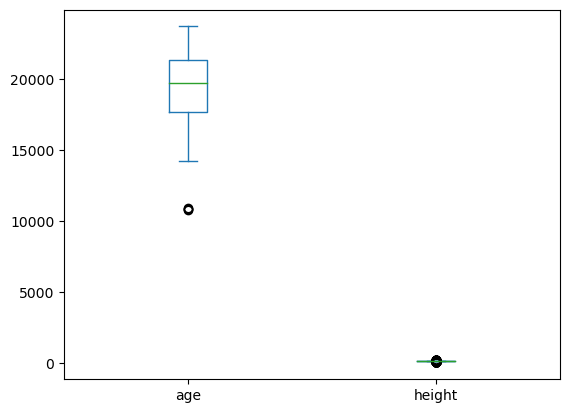

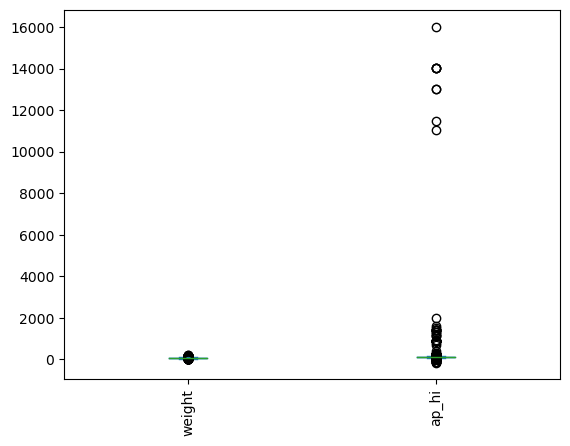

In [9]:
#grouped by reference value ranges of columns in order to properly visualize different scales together and id is conciously left out
df[continious_columns[1:3]].plot(kind='box')
df[continious_columns[3:5]].plot(kind='box')
plt.xticks(rotation=90)
plt.show()

In [38]:
#check if the weight column is not integer for a reason
df.weight.apply(lambda x: x.is_integer()).all()

False

Check Categorical Data 

- No odd values exits in categorical columns
- Cardio columns values almost split to half between the two columns. Therefore, any model that tosses a coin might end up as a successfull model.

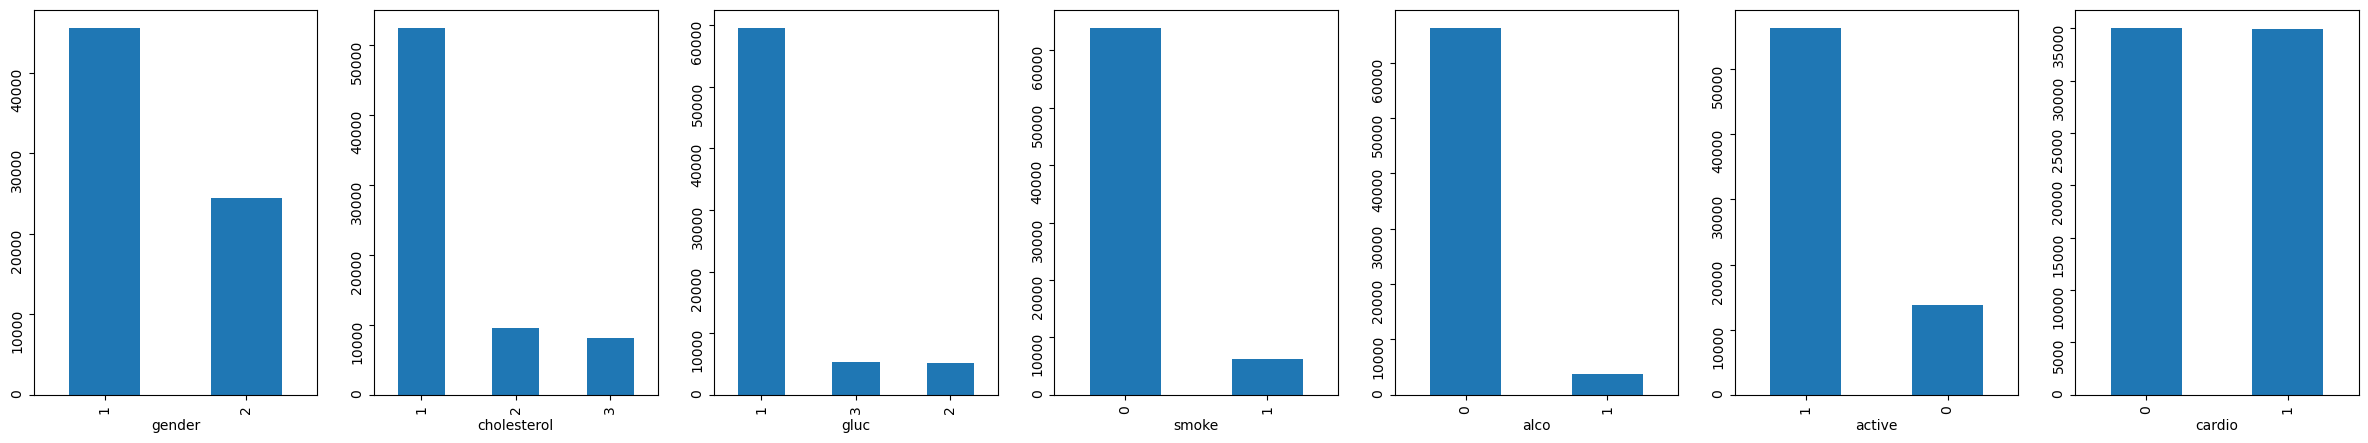

In [10]:
fig, ax = plt.subplots(1, len(categorical_columns), figsize=(30,5) )

for i in categorical_columns:
    df[i].value_counts().plot.bar(ax=ax[categorical_columns.index(i)])
    ax[categorical_columns.index(i)].tick_params(labelrotation=90)